In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
from pprint import pprint 
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask,jsonify

# Climate Analysis and Exploration

In [2]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
from sqlalchemy.orm import Session 
session = Session(bind=engine)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
session = Session(engine)

# Precipitation Analysis

In [8]:
# Start by finding the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date

'2017-08-23'

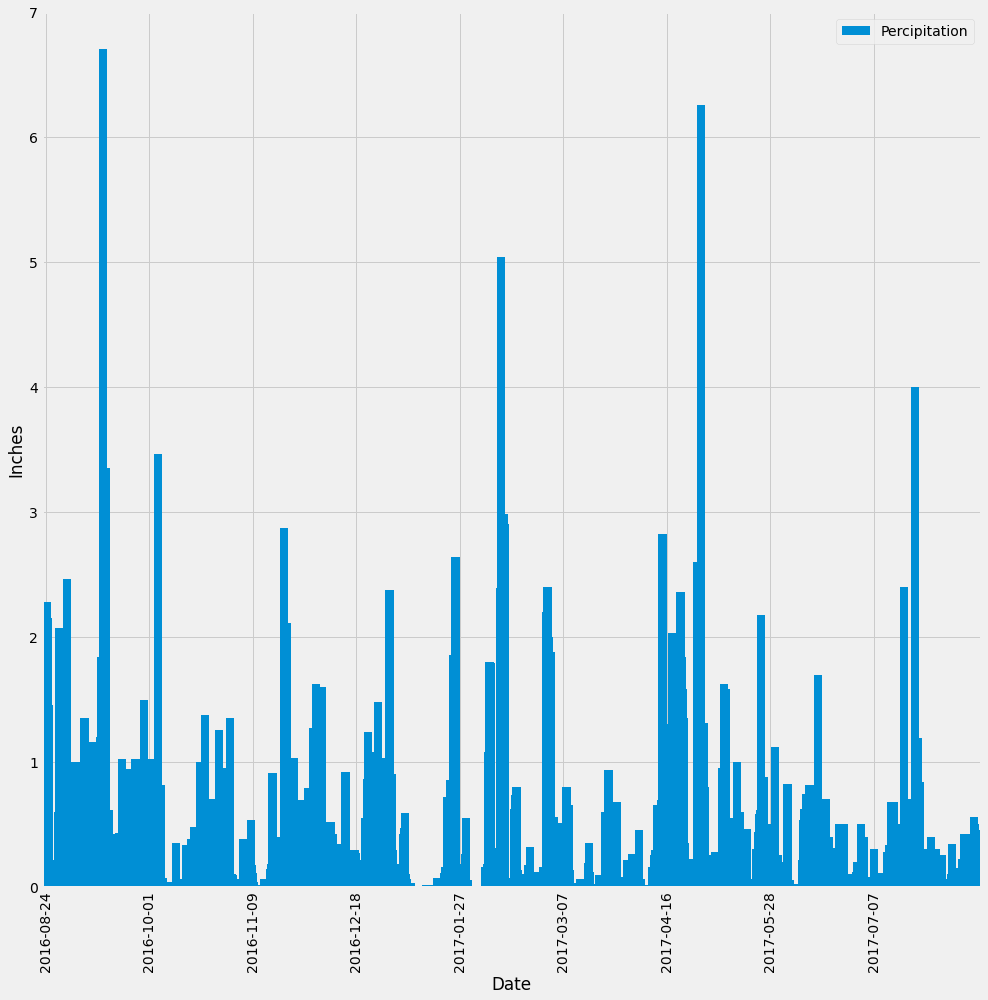

In [9]:
# Using this date, retrieve the last 12 months of precipitation data by querying the 12 preceding months of data. 
#Note you do not pass in the date as a variable to your query.
closest_date_dt = dt.datetime.strptime(recent_date, "%Y-%m-%d")
# Find the date from one year earlier
one_year_ago = closest_date_dt - dt.timedelta(days=365)
one_year_ago_dt = dt.datetime.strftime(one_year_ago,"%Y-%m-%d")

# Select only the date and prcp values.
prcp_scores = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > one_year_ago_dt).\
    order_by(Measurement.date).all()

# Load the query results into a Pandas DataFrame and set the index to the date column.
data = pd.DataFrame(prcp_scores, columns=['Date', 'Percipitation'])
data.set_index('Date', inplace=True)

# Sort the DataFrame values by date.
data = pd.DataFrame.sort_index(data)

# Plot the results using the DataFrame plot method.
data.plot.bar(figsize=(15,15), width=20)
plt.ylabel('Inches')
plt.locator_params(axis='x', nbins=9)
plt.ylim(0,max(data['Percipitation'])+.3)
plt.show();

In [10]:
data.describe()

,Percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [11]:
# Design a query to calculate the total number of stations in the dataset.
total_number_of_stations = session.query(Station).\
    group_by(Station.station).count()
total_number_of_stations

9

In [12]:
# Design a query to find the most active stations (i.e. which stations have the most rows?).
# Also, List the stations and observation counts in descending order.

The_total_number_of_active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

The_total_number_of_active_stations



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Which station id has the lowest number of observations based on the most active stations on the previous query?

The_minimum_active_station = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()

lowest_temp = The_minimum_active_station[0] 
print(f"The most active station's lowest temperature is {lowest_temp}.")



The most active station's lowest temperature is (54.0,).


In [14]:
# Which station id has the highest number of observations based on the most active stations on the previous query?

The_maximum_active_station = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()

highest_temp = The_maximum_active_station[0] 
print(f"The most active station's highest temperature is {highest_temp}.")

The most active station's highest temperature is (85.0,).


In [15]:
# Which station id had the average number of observations based on the most active stations on the previous query?

The_average_active_station = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station =='USC00519281').all()

average_temp = The_average_active_station[0] 
print(f"The most active station's average temperature is {average_temp}.")

The most active station's average temperature is (71.66378066378067,).


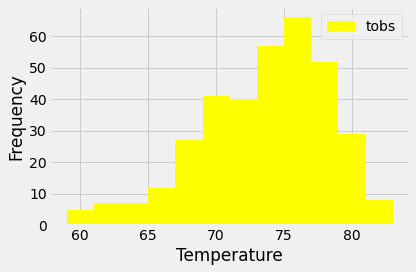

In [16]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
# Filter by the station with the highest number of observations.
# Query the last 12 months of temperature observation data for this station.

The_most_active_last_12_months = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date > one_year_ago_dt).all()

temp_list = []
for temp in The_most_active_last_12_months:
    temp_list.append(temp[1])







# Plot the results as a histogram with bins=12.
plt.hist(temp_list, color='yellow', bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
yellow_patch = mpatches.Patch(color='yellow', label='tobs')
plt.tight_layout()
plt.legend(handles=[yellow_patch])
plt.show()





In [17]:
session.close()